<a href="https://colab.research.google.com/github/sherri-ice/DataAnalyseProject/blob/ml/vkiad_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
from pandas import Series, DataFrame

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99',
          '#7e7ef2', '#bf03bf', '#ebc917', '#ffccff',
          '#afe8e5', '#729edf', '#bde8af', '#e9895c',
          '#b6e8af', '#afafe8', '#e8d6af', '#e8afba']

In [2]:
uri_to_data_frame = "https://raw.githubusercontent.com/sherri-ice/DataAnalyseProject/main/dataframe.csv"
data_frame =  pd.read_csv(uri_to_data_frame)
data_frame

,Отметка времени,Ваш пол,Ваш факультет,Ваш средний балл,"Сколько времени в среднем в день Вы уделяете учебе (домашние работы, лабораторные)",Ваш знак зодиака,Как часто Вы пьёте алкоголь?,Как часто Вы курите (сигареты/вейп/кальян)?,Как часто Вы пьёте кофе/энергетики?,Работаете ли Вы на данный момент?,Как часто Вы посещаете пары?,Сколько Вы спите в будний день?,Были ли у Вас серьёзные мысли об отчислении?,"Были ли у Вас мысли о суициде, была ли депрессия?",Болели ли Вы Covid-19?,Как часто Вы ходите в библиотеку?,Кем Вы себя считаете?,Состоите ли Вы в Студенческом союзе или похожих организациях?,Есть ли у Вас хобби вне университета?,Есть ли у Вас отношения?,Занимаетесь ли Вы спортом?,Вы учитесь на платной или бесплатной основе?,Количество пересдач за всё время обучения,Вы натуральный блондин
0,2021/11/26 12:21:04 PM GMT+3,Предпочитаю не говорить (подаюсь в гугл),ФПМИ,5.1 - 7.0,"Могу посидеть и 3, и 4",Рыбы,Не пью,Не курю,Не пью,Нет,Пропускаю <25% пар в неделю,7-8 часов в сутки,Да,Нет,"Да, во время студенчества",Не хожу в библиотеку,Интроверт,Нет,Да,Да,"Да, но только на физре","Бесплатно, потерял стипендию",1-5 пересдач,Нет(
1,2021/11/26 12:21:41 PM GMT+3,Предпочитаю не говорить (подаюсь в гугл),ФПМИ,5.1 - 7.0,Максимум 2 часа,Дева,Раз в месяц,Не курю,Пью почти каждый день,Нет,Пропускаю <25% пар в неделю,4-6 часов в сутки,Да,Да,"Да, во время студенчества",Не хожу в библиотеку,Интроверт,Нет,Да,Да,"Да, но только на физре",Платно,1-5 пересдач,Нет(
2,2021/11/26 12:21:57 PM GMT+3,Мужской,ФПМИ,7.1 - 8.0,"Могу посидеть и 3, и 4",Козерог,Не пью,Не курю,"Пью реже, чем раз в две недели","Да, по специальности",Хожу на все пары,7-8 часов в сутки,Нет,Нет,"Нет, не болел",Не хожу в библиотеку,Интроверт,Нет,Да,Нет,"Да, вне физры","Бесплатно, получаю стипендию",Не пересдавал(а),Нет(
3,2021/11/26 12:22:31 PM GMT+3,Женский,ФПМИ,5.1 - 7.0,"Могу посидеть и 3, и 4",Весы,Раз в месяц,Не курю,Пью 1-3 раза в неделю,Нет,Хожу на все пары,7-8 часов в сутки,Да,Да,"Нет, не болел","Редко, 1-2 раза в месяц",Амбиверт,Нет,Да,Нет,"Да, но только на физре","Бесплатно, получаю стипендию",Не пересдавал(а),"Да, на всю страну такой один"
4,2021/11/26 12:22:53 PM GMT+3,Мужской,ФПМИ,8.1 - 9.0,Ботаю ол дэй лонг,Овен,Раз в неделю,"Реже, чем раз в день","Пью реже, чем раз в две недели","Да, по специальности",Пропускаю >70% пар в неделю,7-8 часов в сутки,Нет,Нет,"Нет, не болел",Не хожу в библиотеку,Экстраверт,Нет,Да,Да,"Да, вне физры","Бесплатно, получаю стипендию",Не пересдавал(а),Нет(
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,2021/12/05 12:48:57 AM GMT+3,Мужской,ММФ,7.1 - 8.0,Ботаю ол дэй лонг,Лев,Раз в месяц,"Больше, чем 3 раза в день","Пью реже, чем раз в две недели",Нет,Пропускаю <50% пар в неделю,4-6 часов в сутки,Да,Да,"Да, во время студенчества",Не хожу в библиотеку,Экстраверт,Да,Да,Да,"Да, но только на физре","Бесплатно, получаю стипендию",Не пересдавал(а),Нет(
230,2021/12/05 1:45:07 PM GMT+3,Женский,ММФ,7.1 - 8.0,"Могу посидеть и 3, и 4",Овен,Не пью,"Больше, чем 3 раза в день",Пью почти каждый день,"Да, не по специальности",Пропускаю <25% пар в неделю,4-6 часов в сутки,Нет,Да,"Да, до поступления",Не хожу в библиотеку,Амбиверт,Нет,Да,Да,"Да, вне физры","Бесплатно, получаю стипендию",Не пересдавал(а),Нет(
231,2021/12/05 8:54:15 PM GMT+3,Женский,ММФ,8.1 - 9.0,Максимум 2 часа,Скорпион,Раз в месяц,Не курю,Пью почти каждый день,"Да, не по специальности",Хожу на все пары,7-8 часов в сутки,Да,Да,"Нет, не болел",Не хожу в библиотеку,Амбиверт,Нет,Да,Нет,"Да, но только на физре","Бесплатно, получаю стипендию",Не пересдавал(а),Нет(
232,2021/12/06 3:36:11 AM GMT+3,Мужской,ММФ,5.1 - 7.0,Максимум 2 часа,Козерог,Раз в неделю,"Реже, чем раз в день",Пью почти каждый день,"Да, не по специальности",Пропускаю <50% пар в неделю,4-6 часов в сутки,Да,Нет,"Да, во время студенчества",Не хожу в библиотеку,Интроверт,Да,Да,Да,Нет,"Бесплатно, потерял стипендию",Больше 5 пересдач,Нет(


#Чистим датасет

Переименуем колонки для более компактного кода

In [3]:
data_frame.rename(columns = {'Отметка времени':'time', \
                             'Ваш пол':'gender', \
                             'Ваш факультет': 'faculty',\
                             'Ваш средний балл': 'average_grade',
                             'Сколько времени в среднем в день Вы уделяете учебе (домашние работы, лабораторные)':'study_time',\
                             'Ваш знак зодиака': 'zodiac_sign',\
                             'Как часто Вы пьёте алкоголь?': 'alcohol',\
                             'Как часто Вы курите (сигареты/вейп/кальян)?': 'smoke',\
                             'Как часто Вы пьёте кофе/энергетики?': 'coffee',\
                             'Работаете ли Вы на данный момент?': 'work', \
                             'Как часто Вы посещаете пары?': 'attendance', \
                             'Сколько Вы спите в будний день?': 'sleep',\
                             'Были ли у Вас серьёзные мысли об отчислении?':'expulsion', \
                             'Были ли у Вас мысли о суициде, была ли депрессия?': 'depression',
                             'Болели ли Вы Covid-19?': 'covid19',
                             'Как часто Вы ходите в библиотеку?': 'library_attendance',\
                             'Кем Вы себя считаете?': 'person_type', \
                             'Состоите ли Вы в Студенческом союзе или похожих организациях?': 'student_union', \
                             'Есть ли у Вас хобби вне университета?': 'hobby',\
                             'Есть ли у Вас отношения?': 'relationship',\
                             'Занимаетесь ли Вы спортом?': 'sport',\
                             'Вы учитесь на платной или бесплатной основе?': 'education_type', \
                             'Количество пересдач за всё время обучения': 'failed_exams',
                             'Вы натуральный блондин': 'blond'},\
                             inplace=True)


Удалим столбец с временем заполнения формы, он нас не интересует:

In [4]:
data_frame = data_frame.drop('time', axis = 1)

В некотрых столбцах заменим данные типа Да/Нет на True/False:

In [5]:
true_false_categories = ['covid19', 'work', 'sport', 'coffee', 'smoke', 'alcohol', 
                        'failed_exams', 'expulsion', 'depression', 'library_attendance', 
                        'student_union', 'relationship', 'hobby', 'blond']
data_frame[true_false_categories] = data_frame[true_false_categories].replace(['Да, во время студенчества',
                                                                               'Да, до поступления', 'Да',
                                                                               'Да, на всю страну такой один', 
                                                                               'Да, по специальности', 
                                                                               'Да, не по специальности',
                                                                               'Пью почти каждый день',
                                                                               'Реже, чем раз в день',
                                                                               '2-3 раза в день',
                                                                               'Раз в неделю',
                                                                               'Чаще, чем раз в неделю',
                                                                               'Да, вне физры',
                                                                               'Очень часто, 2-3 раза в неделю',
                                                                                                                                   'Часто, 1-2 раза в неделю',
                                                                                                                                   '1-5 пересдач',
                                                                                                                                   'Больше 5 пересдач',
                                                                                                                                   'Да, но только на физре',
                                                                                                                                   'Больше, чем 3 раза в день',
                                                                                                                                   'Пью 1-3 раза в неделю'], True)
data_frame[true_false_categories] = data_frame[true_false_categories].replace(['Нет, не болел', 
                                                                               'Нет', 
                                                                                                                           'Нет(',
                                                                                                                           'Не пересдавал(а)',
                                                                                                                           'Не пью',
                                                                                                                           'Редко, 1-2 раза в месяц',
                                                                                                                           'Не хожу в библиотеку',                                                                                                                           'Не курю',
                                                                                                                           'Раз в месяц',
                                                                                                                           'Только если выпиваю',
                                                                                                                           'Пью реже, чем раз в две недели'], False)

In [6]:
data_frame['attendance'] = data_frame['attendance'].replace({'Пропускаю <25% пар в неделю': 0.25,
                                                            'Хожу на все пары': 0,
                                                             'Пропускаю <50% пар в неделю': 0.5,
                                                             'Пропускаю >70% пар в неделю': 1})

data_frame['sleep'] = data_frame['sleep'].replace({'4-6 часов в сутки': 5,
                                                  '7-8 часов в сутки': 7.5,
                                                  '2-3 часа в сутки': 2.5})

data_frame['study_time'] = data_frame['study_time'].replace({'0 часов 0 минут 0 секунд': 0,
                                                             'Максимум 2 часа': 2,
                                                             'Могу посидеть и 3, и 4': 4,
                                                             'Ботаю ол дэй лонг': 10})

В колонке `gender` помимо вариантов ответа "мужской", "женский", мы получили несколько неопределенных вариантов, которые для нас равносильны `Nan`. Просто выкинуть их из датасета мы не можем, так как нам важна остальная информация в этих строчках.

In [7]:
data_frame.gender

0      Предпочитаю не говорить (подаюсь в гугл)
1      Предпочитаю не говорить (подаюсь в гугл)
2                                       Мужской
3                                       Женский
4                                       Мужской
                         ...                   
229                                     Мужской
230                                     Женский
231                                     Женский
232                                     Мужской
233                                     Женский
Name: gender, Length: 234, dtype: object

Так как корректных данных в колонке гораздо больше, мы решили невалидные данные заменить в том же процентном отношении, в котором сейчас находятся ответы Мужской / Женский.

In [8]:
data_frame['gender'].replace(['Мужской'], 'm', inplace = True)
data_frame['gender'].replace(['Женский'], 'f', inplace = True)
gender = data_frame.loc[:, 'gender']
gender = DataFrame(gender.value_counts())

num_of_men = gender.loc['m']
num_of_women = gender.loc['f']
percent_of_men = num_of_men / (num_of_women + num_of_men)
num_of_men = int(gender.loc['Предпочитаю не говорить (подаюсь в гугл)'] * percent_of_men) 
num_of_women = int(gender.loc['Предпочитаю не говорить (подаюсь в гугл)'] - num_of_men)

In [9]:
data_frame.gender.replace(['Предпочитаю не говорить (подаюсь в гугл)'], np.nan, inplace = True)
print('Уникальные поля до замены ', data_frame.gender.unique())
data_frame.gender.fillna('m', limit = num_of_men, inplace = True)
print('Уникальные поля после замены части Nan-ов ', data_frame.gender.unique())
data_frame.gender.fillna('f', limit = num_of_women, inplace = True)
print('Уникальные поля после замены всех некорректных данных ', data_frame.gender.unique())

Уникальные поля до замены  [nan 'm' 'f']
Уникальные поля после замены части Nan-ов  ['m' 'f' nan]
Уникальные поля после замены всех некорректных данных  ['m' 'f']


Рассмотри колонку `faculty`. Из графика видно, что получилось неоднородная выборка по факультетам университета. Поэтому в дальнейшем учитывать принадлежность к факультету мы не будем.

15


<BarContainer object of 15 artists>

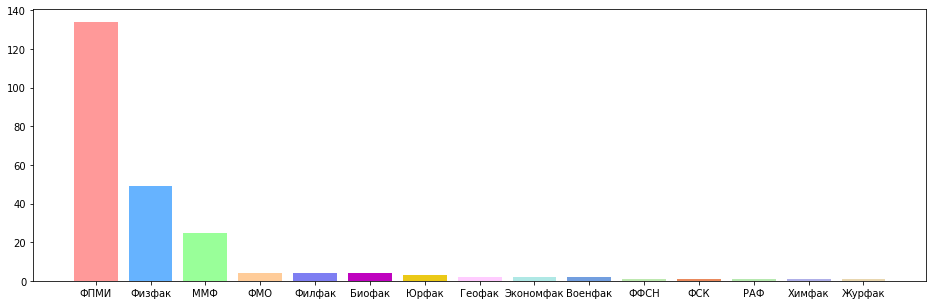

In [44]:
plt.figure(figsize=(16, 5))
print(unique_faculty.index.size)
unique_faculty = data_frame.faculty.value_counts()
plt.xticks(np.arange(unique_faculty.index.size), unique_faculty.index)
plt.bar(range(data_frame.faculty.unique().size), data_frame.faculty.value_counts(), color = colors)

In [11]:
data_frame

,gender,faculty,average_grade,study_time,zodiac_sign,alcohol,smoke,coffee,work,attendance,sleep,expulsion,depression,covid19,library_attendance,person_type,student_union,hobby,relationship,sport,education_type,failed_exams,blond
0,m,ФПМИ,5.1 - 7.0,4,Рыбы,False,False,False,False,0.25,7.5,True,False,True,False,Интроверт,False,True,True,True,"Бесплатно, потерял стипендию",True,False
1,m,ФПМИ,5.1 - 7.0,2,Дева,False,False,True,False,0.25,5.0,True,True,True,False,Интроверт,False,True,True,True,Платно,True,False
2,m,ФПМИ,7.1 - 8.0,4,Козерог,False,False,False,True,0.00,7.5,False,False,False,False,Интроверт,False,True,False,True,"Бесплатно, получаю стипендию",False,False
3,f,ФПМИ,5.1 - 7.0,4,Весы,False,False,True,False,0.00,7.5,True,True,False,False,Амбиверт,False,True,False,True,"Бесплатно, получаю стипендию",False,True
4,m,ФПМИ,8.1 - 9.0,10,Овен,True,True,False,True,1.00,7.5,False,False,False,False,Экстраверт,False,True,True,True,"Бесплатно, получаю стипендию",False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,m,ММФ,7.1 - 8.0,10,Лев,False,True,False,False,0.50,5.0,True,True,True,False,Экстраверт,True,True,True,True,"Бесплатно, получаю стипендию",False,False
230,f,ММФ,7.1 - 8.0,4,Овен,False,True,True,True,0.25,5.0,False,True,True,False,Амбиверт,False,True,True,True,"Бесплатно, получаю стипендию",False,False
231,f,ММФ,8.1 - 9.0,2,Скорпион,False,False,True,True,0.00,7.5,True,True,False,False,Амбиверт,False,True,False,True,"Бесплатно, получаю стипендию",False,False
232,m,ММФ,5.1 - 7.0,2,Козерог,True,True,True,True,0.50,5.0,True,False,True,False,Интроверт,True,True,True,False,"Бесплатно, потерял стипендию",True,False


# ML

Spoiler: получились довольно странные результаты, кажется, что где-то мы что-то сделали не так :)

In [12]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_absolute_error

Так как у нас есть категории, которые никак нельзя привести к виду ответа на вопрос "Да/Нет", либо к численному ответу, то надо их как-то закодировать в числа:

In [30]:
names_of_categorical = ['gender', 'zodiac_sign', 
                         'person_type', 'education_type']

categories = {}
categories['gender'] = ['m', 'f']
categories['zodiac_sign'] = data_frame.zodiac_sign.unique()
categories['person_type'] = ['Интроверт', 'Амбиверт', 'Экстраверт']
categories['education_type'] = ['Платно', 'Бесплатно, потерял стипендию', 'Бесплатно, получаю стипендию']

In [14]:
# Off warnings
pd.set_option('mode.chained_assignment', None)

In [15]:
def encode_categories(x, name):
  j = 1
  for i in categories[name]:
    x[name][x[name] == i] = j
    j += 1

def encode_grades(x, grades):
  j = 1
  for i in grades:
    x[x == i] = j
    j += 1

Из исследования выше выяснилось, что факультетов для полноценного анализа оказалось недостаточно, так что не будем анализировать эту колонку:

In [16]:
x = data_frame.drop(columns = ['average_grade', 'faculty'])
for i in names_of_categorical:
  encode_categories(x, i)
y = data_frame.average_grade
grades = np.sort(y.unique())
encode_grades(y, grades)

In [17]:
# Off warning
pd.reset_option("mode.chained_assignment")

Т.к. ответы на вопрос о среднем балле представлены в виде интервалов, то будем рассматривать студентов с баллом 4.0 - 5.0 как отстающих студентов, с баллом 5.1 - 7.0 как студентов с плохой успеваемостью, с баллом 7.1 - 8.0 как "среднячков", с баллом 8.1 - 9.0 как "хорошистов" и с баллом 9.1 - 10.0 как отличников.
Тогда возникает задача классификацию, которую можно решить с помощью `RandomForestClassifier`:



In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf = RandomForestClassifier(n_estimators=50)

# Разделяем датасеты для обучения
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Just don't touch this
y_train = y_train.astype('float')
y_test = y_test.astype('float')

# Тренируем модель
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)
print(accuracy_score(y_pred, y_test))
weights = clf.feature_importances_

0.4507042253521127


К сожалению, точность не такая, как хотелось бы. Наверное, это связано со слабой корреляцией данных признаков. Давайте посмотрим:

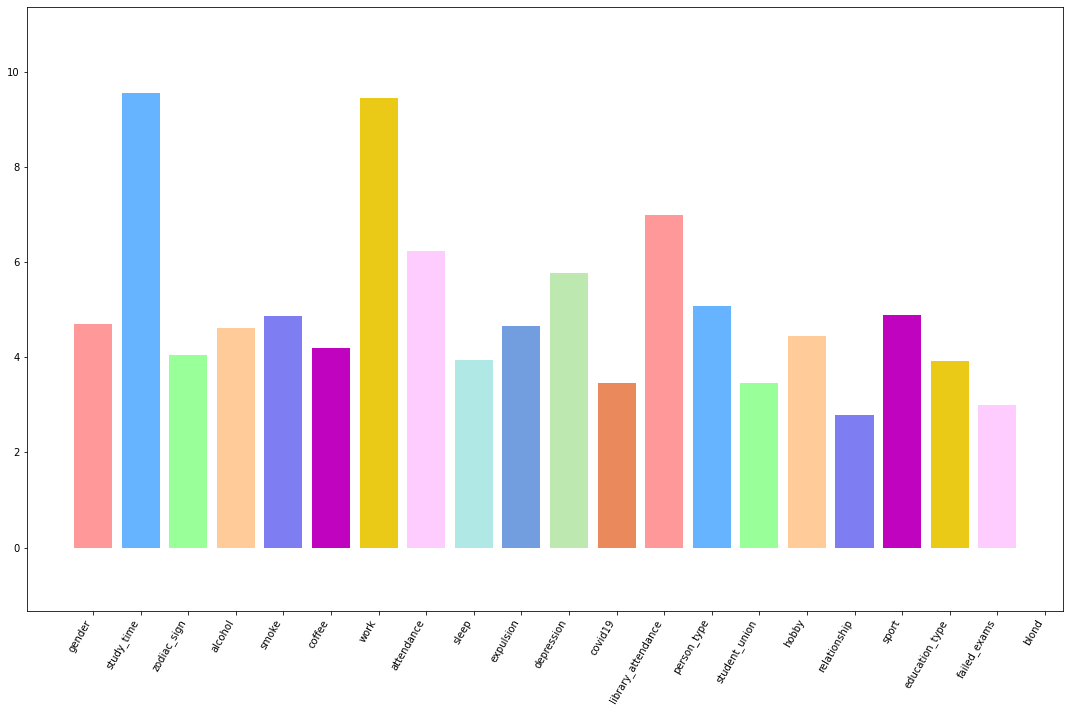

In [36]:
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw=dict(aspect="equal"))

labels = data_frame.drop(columns = ['average_grade','faculty']).columns

plt.bar(np.arange(len(weights)), weights * 100, color=colors)
plt.xticks(np.arange(labels.size), labels, rotation=60, ha="right")
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.tight_layout()

Ух ты, неожиданно в топ вылез знак зодиака. Здорово, конечно, но астрология точно никак не вяжется с обучением студентов.
Давайте попробуем убрать знак зодиака как признак:

In [31]:
x = data_frame.drop(columns = ['average_grade', 'faculty', 'zodiac_sign'])
del categories['zodiac_sign']
names_of_categorical.remove('zodiac_sign')
for i in names_of_categorical:
  encode_categories(x, i)
y = data_frame.average_grade
grades = np.sort(y.unique())
encode_grades(y, grades)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf = RandomForestClassifier(n_estimators=50)

# Разделяем датасеты для обучения
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Just don't touch this
y_train = y_train.astype('float')
y_test = y_test.astype('float')

# Тренируем модель
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)
print(accuracy_score(y_pred, y_test))
weights = clf.feature_importances_

0.28169014084507044


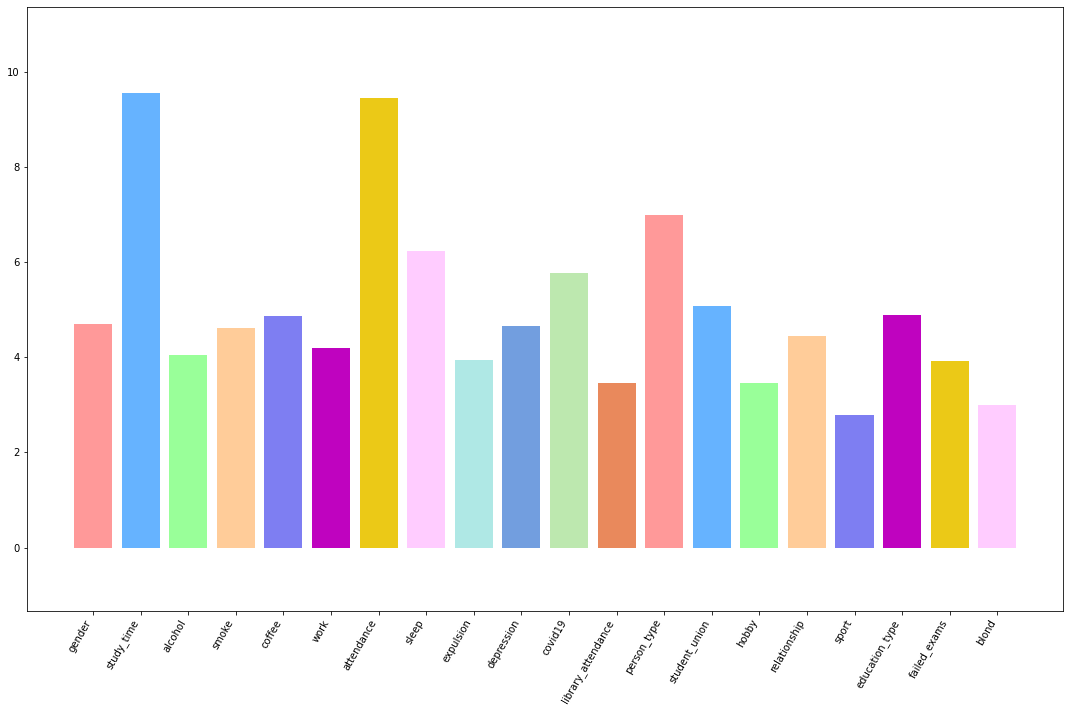

In [34]:
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw=dict(aspect="equal"))

labels = data_frame.drop(columns = ['average_grade','faculty','zodiac_sign']).columns
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99',
          '#7e7ef2', '#bf03bf', '#ebc917', '#ffccff',
          '#afe8e5', '#729edf', '#bde8af', '#e9895c']

plt.bar(np.arange(len(weights)), weights * 100, color=colors)
plt.xticks(np.arange(labels.size), labels, rotation=60, ha="right")
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.tight_layout()

Уже больше похоже на правду. Как видно, оценка студента сильнее зависит от времени, затраченного на учебу, и посещаемости (что на самом деле довольно спорно).